In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def to_csv(data, filename):
    """
    data : dataframe
    filename : nama file bentuk csv
    """
    return data.to_csv('{}.csv'.format(filename), index=False)

In [3]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


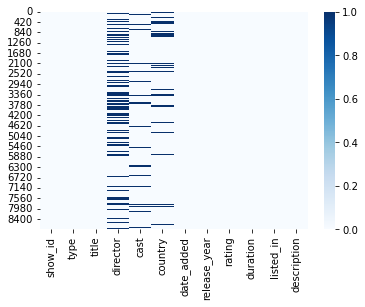

In [5]:
sns.heatmap(df.isnull(), cmap='Blues')
plt.show()

In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
print('The percentage of null values in the columns consisting of null values:\n')

for i in df.columns:
    null_rate = df[i].isna().sum() / len(df)
    if null_rate > 0:
        print(f"null rate of {i} column {null_rate:.2%}")

The percentage of null values in the columns consisting of null values:

null rate of director column 29.91%
null rate of cast column 9.37%
null rate of country column 9.44%
null rate of date_added column 0.11%
null rate of rating column 0.05%
null rate of duration column 0.03%


In [8]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['day_added'] = df['date_added'].dt.day
df['day_name_added'] = df['date_added'].dt.day_name()
df['month_added'] = df['date_added'].dt.month
df['month_name_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

In [9]:
df = df.drop(['show_id'], axis=1)
df.isnull().sum()

type                   0
title                  0
director            2634
cast                 825
country              831
date_added            10
release_year           0
rating                 4
duration               3
listed_in              0
description            0
day_added             10
day_name_added        10
month_added           10
month_name_added      10
year_added            10
dtype: int64

In [10]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'].replace(np.nan, 'No Data', inplace=True)
df['director'].replace(np.nan, 'No Data', inplace=True)
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

type                0
title               0
director            0
cast                0
country             0
date_added          0
release_year        0
rating              0
duration            0
listed_in           0
description         0
day_added           0
day_name_added      0
month_added         0
month_name_added    0
year_added          0
dtype: int64

In [12]:
df['day_added'] = df.day_added.astype('int64')
df['month_added'] = df.month_added.astype('int64')
df['year_added'] = df.year_added.astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   type              8790 non-null   object        
 1   title             8790 non-null   object        
 2   director          8790 non-null   object        
 3   cast              8790 non-null   object        
 4   country           8790 non-null   object        
 5   date_added        8790 non-null   datetime64[ns]
 6   release_year      8790 non-null   int64         
 7   rating            8790 non-null   object        
 8   duration          8790 non-null   object        
 9   listed_in         8790 non-null   object        
 10  description       8790 non-null   object        
 11  day_added         8790 non-null   int64         
 12  day_name_added    8790 non-null   object        
 13  month_added       8790 non-null   int64         
 14  month_name_added  8790 n

# Genre Manipulated

In [13]:
df['listed_in'] = df.listed_in.str.replace('&', ',')

In [14]:
genre_1 = df.listed_in.str.split(",").str[0].to_list()
genre_2 = df.listed_in.str.split(",").str[1].to_list()
genre_3 = df.listed_in.str.split(",").str[2].to_list()

df['genre_1'] = genre_1
df['genre_2'] = genre_2
df['genre_3'] = genre_3

df['genre_2'].replace(np.nan, '', inplace=True)
df['genre_3'].replace(np.nan, '', inplace=True)

df['genre_1'] = df.genre_1.str.strip()
df['genre_2'] = df.genre_2.str.strip()
df['genre_3'] = df.genre_3.str.strip()

In [15]:
print(df['genre_1'].nunique())
print(df['genre_2'].nunique())
print(df['genre_3'].nunique())

35
41
44


In [16]:
genre = pd.read_csv('netflix_genre.csv')
genre_all = genre.genre.to_list()
genre_manipulated = df.genre_3.to_list()
result = set(genre_all) - set(genre_manipulated)
print(list(result))

['Movies', 'Action', 'Classic', 'British TV Shows', 'Anime Series', 'TV Shows']


In [17]:
df['genre_3'].loc[(df.genre_1 == 'Action') & (df.genre_3 == '')] = 'Action'
df['genre_3'].loc[(df.genre_1 == 'Classic') & (df.genre_3 == '')] = 'Classic'
df['genre_3'].loc[(df.genre_1 == 'Movies') & (df.genre_3 == '')] = 'Movies'
df['genre_3'].loc[(df.genre_1 == 'TV Shows') & (df.genre_3 == '')] = 'TV Shows'
df['genre_3'].loc[(df.genre_1 == 'Anime Series') & (df.genre_3 == '')] = 'Anime Series'
df['genre_3'].loc[(df.genre_1 == 'British TV Shows') & (df.genre_3 == '')] = 'British TV Shows'

C:\Users\Akhmad Taufik\AppData\Local\Temp\ipykernel_2964\3490028168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre_3'].loc[(df.genre_1 == 'Action') & (df.genre_3 == '')] = 'Action'
C:\Users\Akhmad Taufik\AppData\Local\Temp\ipykernel_2964\3490028168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre_3'].loc[(df.genre_1 == 'Classic') & (df.genre_3 == '')] = 'Classic'
C:\Users\Akhmad Taufik\AppData\Local\Temp\ipykernel_2964\3490028168.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

In [18]:
df['genre_3'].nunique()

49

In [19]:
genre_all = genre.genre.to_list()
genre_manipulated = df.genre_3.to_list()

result = set(genre_all) - set(genre_manipulated)
print(list(result))

['Classic']


In [20]:
df['genre_3'].loc[(df.title == 'Jericho') & (df.genre_3 == 'TV Action')] = 'Classic'

C:\Users\Akhmad Taufik\AppData\Local\Temp\ipykernel_2964\1481575865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre_3'].loc[(df.title == 'Jericho') & (df.genre_3 == 'TV Action')] = 'Classic'


# Cleaning Country Name

In [21]:
df.country.unique()

array(['United States', 'South Africa', 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kingdom,

In [22]:
country_1 = df.country.str.split(",").str[0].to_list()
country_2 = df.country.str.split(",").str[1].to_list()
country_3 = df.country.str.split(",").str[2].to_list()
country_4 = df.country.str.split(",").str[3].to_list()

df['country_1'] = country_1
df['country_2'] = country_2
df['country_3'] = country_3
df['country_4'] = country_4

df['country_1'].replace(np.nan, '', inplace=True)
df['country_2'].replace(np.nan, '', inplace=True)
df['country_3'].replace(np.nan, '', inplace=True)
df['country_4'].replace(np.nan, '', inplace=True)

df['country_1'] = df.country_1.str.strip()
df['country_2'] = df.country_2.str.strip()
df['country_3'] = df.country_3.str.strip()
df['country_4'] = df.country_4.str.strip()

In [23]:
print(df.country_1.nunique())
print(df.country_2.nunique())
print(df.country_3.nunique())
print(df.country_4.nunique())

86
93
61
50


In [24]:
country = pd.read_csv('netflix_count_country.csv')
country_all = country.country.to_list()
country_manipulated = df.country_2.to_list()

result = set(country_all) - set(country_manipulated)
print(list(result))

[nan, 'Mauritius', 'Panama', 'Cyprus', 'Dominican Republic', 'Kuwait', 'Vietnam', 'Ecuador', 'Burkina Faso', 'Sudan', 'Bahamas', 'Cameroon', 'Montenegro', 'Liechtenstein', 'Albania', 'Samoa', 'Ethiopia', 'Serbia', 'Belarus', 'Bangladesh', 'Jamaica', 'Mozambique', 'Somalia', 'Mongolia', 'Latvia', 'Uganda', 'Paraguay', 'Puerto Rico', 'Afghanistan', 'Cayman Islands', 'Georgia']


In [25]:
df['country_2'].loc[(df.country_1 == 'Samoa') & (df.country_2 == '')] = 'Samoa'
df['country_2'].loc[(df.country_1 == 'Kuwait') & (df.country_2 == '')] = 'Kuwait'
df['country_2'].loc[(df.country_1 == 'Bangladesh') & (df.country_2 == '')] = 'Bangladesh'
df['country_2'].loc[(df.country_1 == 'Sudan') & (df.country_2 == '')] = 'Sudan'
df['country_2'].loc[(df.country_1 == 'Vietnam') & (df.country_2 == '')] = 'Vietnam'
df['country_2'].loc[(df.country_1 == 'Georgia') & (df.country_2 == '')] = 'Georgia'
df['country_2'].loc[(df.country_1 == 'Ethiopia') & (df.country_2 == '')] = 'Ethiopia'
df['country_2'].loc[(df.country_1 == 'Cameroon') & (df.country_2 == '')] = 'Cameroon'
df['country_2'].loc[(df.country_1 == 'Liechtenstein') & (df.country_2 == '')] = 'Liechtenstein'
df['country_2'].loc[(df.country_1 == 'Mauritius') & (df.country_2 == '')] = 'Mauritius'
df['country_2'].loc[(df.country_1 == 'Paraguay') & (df.country_2 == '')] = 'Paraguay'
df['country_2'].loc[(df.country_1 == 'Uganda') & (df.country_2 == '')] = 'Uganda'
df['country_2'].loc[(df.country_1 == 'Montenegro') & (df.country_2 == '')] = 'Montenegro'
df['country_2'].loc[(df.country_1 == 'Bahamas') & (df.country_2 == '')] = 'Bahamas'
df['country_2'].loc[(df.country_1 == 'Ecuador') & (df.country_2 == '')] = 'Ecuador'
df['country_2'].loc[(df.country_1 == 'Dominican Republic') & (df.country_2 == '')] = 'Dominican Republic'
df['country_2'].loc[(df.country_1 == 'Burkina Faso') & (df.country_2 == '')] = 'Burkina Faso'
df['country_2'].loc[(df.country_1 == 'Albania') & (df.country_2 == '')] = 'Albania'
df['country_2'].loc[(df.country_1 == 'Somalia') & (df.country_2 == '')] = 'Somalia'
df['country_2'].loc[(df.country_1 == 'Cayman Islands') & (df.country_2 == '')] = 'Cayman Islands'
df['country_2'].loc[(df.country_1 == 'Cyprus') & (df.country_2 == '')] = 'Cyprus'
df['country_2'].loc[(df.country_1 == 'Belarus') & (df.country_2 == '')] = 'Belarus'
df['country_2'].loc[(df.country_1 == 'Puerto Rico') & (df.country_2 == '')] = 'Puerto Rico'
df['country_2'].loc[(df.country_1 == 'Mongolia') & (df.country_2 == '')] = 'Mongolia'
df['country_2'].loc[(df.country_1 == 'Latvia') & (df.country_2 == '')] = 'Latvia'
df['country_2'].loc[(df.country_1 == 'Panama') & (df.country_2 == '')] = 'Panama'
df['country_2'].loc[(df.country_1 == 'Mozambique') & (df.country_2 == '')] = 'Mozambique'
df['country_2'].loc[(df.country_1 == 'Serbia') & (df.country_2 == '')] = 'Serbia'
df['country_2'].loc[(df.country_1 == 'Jamaica') & (df.country_2 == '')] = 'Jamaica'
df['country_2'].loc[(df.country_1 == 'Afghanistan') & (df.country_2 == '')] = 'Afghanistan'

C:\Users\Akhmad Taufik\AppData\Local\Temp\ipykernel_2964\612559699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country_2'].loc[(df.country_1 == 'Samoa') & (df.country_2 == '')] = 'Samoa'
C:\Users\Akhmad Taufik\AppData\Local\Temp\ipykernel_2964\612559699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country_2'].loc[(df.country_1 == 'Kuwait') & (df.country_2 == '')] = 'Kuwait'
C:\Users\Akhmad Taufik\AppData\Local\Temp\ipykernel_2964\612559699.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

In [26]:
country_all = country.country.to_list()
country_manipulated = df.country_2.to_list()

result = set(country_all) - set(country_manipulated)
print(list(result))

[nan, 'Panama', 'Dominican Republic', 'Ecuador', 'Burkina Faso', 'Sudan', 'Bahamas', 'Montenegro', 'Liechtenstein', 'Albania', 'Samoa', 'Ethiopia', 'Serbia', 'Jamaica', 'Somalia', 'Mongolia', 'Latvia', 'Uganda', 'Paraguay', 'Puerto Rico', 'Afghanistan', 'Cayman Islands']


# Duration

In [27]:
duration_int = df.duration.str.split(' ').str[0].to_list()
df['duration_int'] = duration_int
df['duration_int'] = df.duration_int.astype('int64')


In [28]:
df = df.drop(['duration', 'genre_1', 'genre_2', 'country_3', 'country_4'], axis=1)
df.rename(columns={'genre_3':'genre', 'duration_int':'duration'
                   }, inplace=True)

In [29]:
df

,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,day_added,day_name_added,month_added,month_name_added,year_added,genre,country_1,country_2,duration
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",25,Saturday,9,September,2021,,United States,,90
1,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,Friday,9,September,2021,TV Mysteries,South Africa,,2
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,Friday,9,September,2021,TV Action,United States,,1
3,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24,Friday,9,September,2021,,United States,,1
4,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,Friday,9,September,2021,TV Comedies,India,,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",20,Wednesday,11,November,2019,Thrillers,United States,,158
8803,TV Show,Zombie Dumb,No Data,No Data,United States,2019-07-01,2018,TV-Y7,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",1,Monday,7,July,2019,TV Comedies,United States,,2
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,1,Friday,11,November,2019,,United States,,88
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,"Children , Family Movies, Comedies","Dragged from civilian life, a former superhero...",11,Saturday,1,January,2020,Comedies,United States,,88


In [30]:
to_csv(df, 'netflix_clean')